In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
def read_hist(bit_width, rounding, batch_size):
    folder_name = "probe_check_point"
    bwr = f"{bit_width}{rounding}"
    sub_foler_name = f"w{bwr}e{bwr}g{bwr}a{bwr}b{batch_size}"
    layernames = ["layer1.0.probe", "layer2.1.probe", "layer3.2.probe"]
    item_names = [
        "diff_small_quant_large_real_grads",
        "diff_small_quant_small_real_grads",
        "diff_small_real_large_real_grads",
     ]
    def make_file_name(itemname, layername, tensorname):
        return f"{folder_name}/{sub_foler_name}/{itemname}_{layername}_{tensorname}.npy"
    def make_hist(itemname, layername):
        hists = np.load(make_file_name(itemname, layername, "hists"))
        bins = np.load(make_file_name(itemname, layername, "bins"))
        return hists, bins
    def make_hists(itemname):
        return [make_hist(itemname, layername) for layername in layernames]
    def make_hists_real():
        return {"large_real_grads": [make_hist("large_real_grads", layername) for layername in [0, 4, 8]]}
    def make_all_hists():
        temp = {itemname: make_hists(itemname) for itemname in item_names}
        temp.update(make_hists_real())
        return temp


    return make_all_hists()

bw1nb4 = read_hist(1, "n", 4)

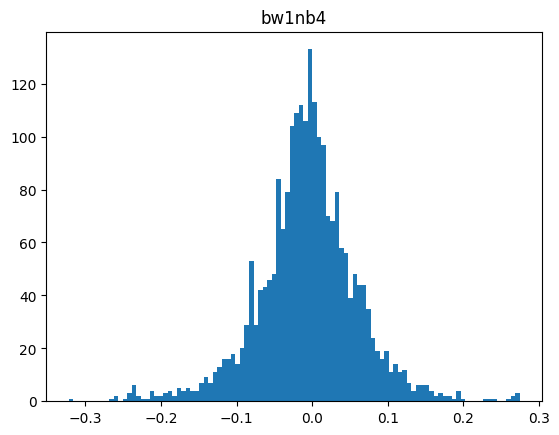

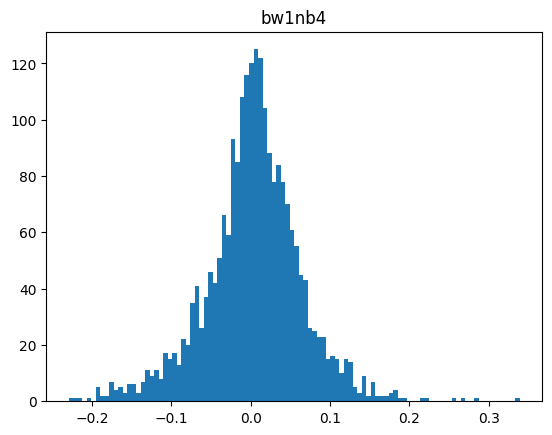

In [24]:
def plot_hist(histsbins, title = "tilte"):
    hists, bins = histsbins
    plt.hist(bins[:-1], bins, weights=hists)
    plt.title(title)
    plt.show()

plot_hist(bw1nb4["diff_small_quant_large_real_grads"][0], "bw1nb4")
plot_hist(bw1nb4["large_real_grads"][0], "bw1nb4")

In [27]:
def mean_of_hists(histsbins):
    hists, bins = histsbins
    return np.mean(bins[:-1] * hists)

def var_of_hists(histsbins):
    hists, bins = histsbins
    return np.var(bins[:-1] * hists)


In [22]:
bw2nb4 = read_hist(2, "n", 4)

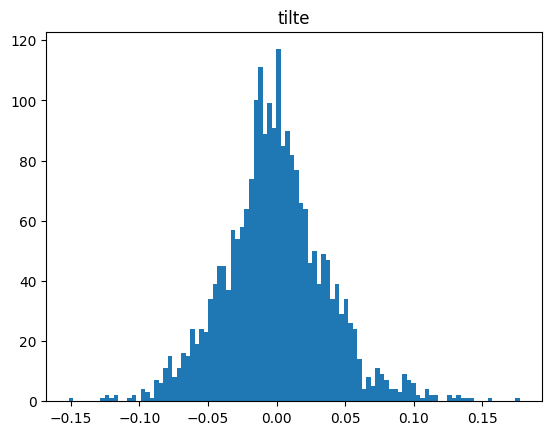

In [25]:
plot_hist(bw2nb4["diff_small_quant_large_real_grads"][0])

In [28]:
mean_of_hists(bw2nb4["diff_small_quant_large_real_grads"][0])

-0.06040886888309615

In [29]:
var_of_hists(bw2nb4["diff_small_quant_large_real_grads"][0])

0.7913940987446902

In [38]:
bw1nb4
bw1nb8 = read_hist(1, "n", 8)
bw1nb16 = read_hist(1, "n", 16)
bw1nb32 = read_hist(1, "n", 32)
bw1nb64 = read_hist(1, "n", 64)
bw1nb128 = read_hist(1, "n", 64)

In [39]:
def plot_multiple_hists_same_graph(histsbins_list, title_list):
    for histsbins, title in zip(histsbins_list, title_list):
        hists, bins = histsbins
        plt.hist(bins[:-1], bins, weights=hists, histtype='step', label=title)
    plt.legend(loc='upper right')
    plt.show()

In [40]:
# is single iteration batched gradient estimation biased / comparing to full precision small batch / full precision full batch?

# the answer is no

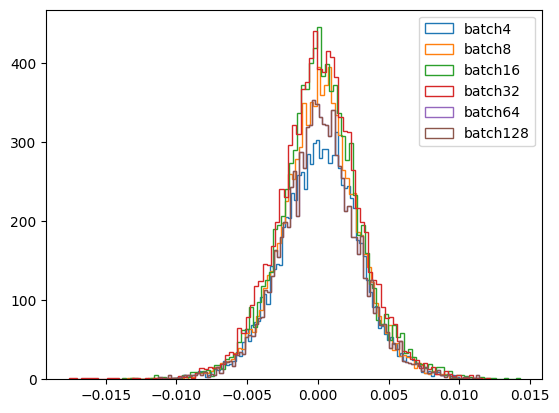

In [43]:
plot_multiple_hists_same_graph(
    [
        bw1nb4["diff_small_real_large_real_grads"][1],
        bw1nb8["diff_small_real_large_real_grads"][1],
        bw1nb16["diff_small_real_large_real_grads"][1],
        bw1nb32["diff_small_real_large_real_grads"][1],
        bw1nb64["diff_small_real_large_real_grads"][1],
        bw1nb128["diff_small_real_large_real_grads"][1],
    ],
    ["batch4", "batch8", "batch16", "batch32", "batch64", "batch128"]
)

question 2:
where does increasing batch size stop working?
try batch size 4 8 16 32 64 128
for full precision model

very hard to tell...


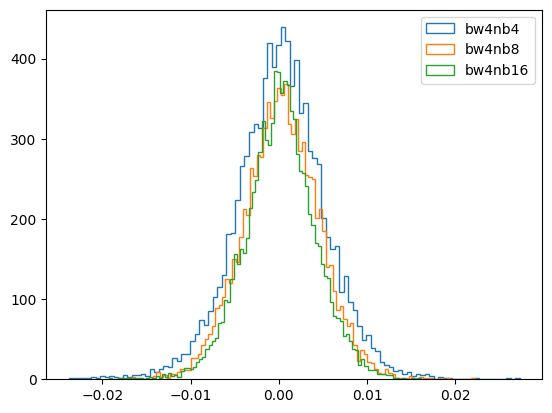

In [44]:
bw4nb4 = read_hist(4, "n", 4)
bw4nb8 = read_hist(4, "n", 8)
bw4nb16 = read_hist(4, "n", 16)
plot_multiple_hists_same_graph(
    [
        bw4nb4["diff_small_quant_large_real_grads"][1],
        bw4nb8["diff_small_quant_large_real_grads"][1],
        bw4nb16["diff_small_quant_large_real_grads"][1],
    ],
    ["bw4nb4", "bw4nb8", "bw4nb16"]
)

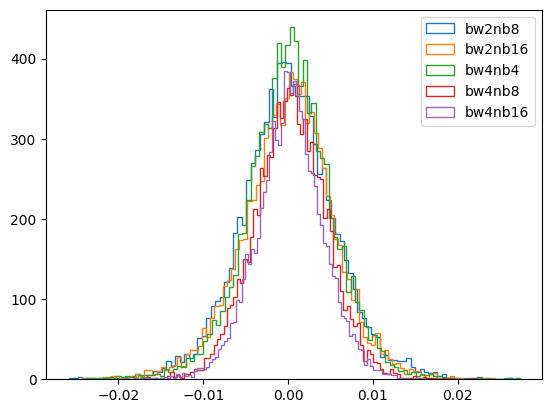

In [47]:
bw2nb4 = read_hist(2, "n", 4)
bw2nb8 = read_hist(2, "n", 8)
bw2nb16 = read_hist(2, "n", 16)
plot_multiple_hists_same_graph(
    [
        bw2nb8["diff_small_quant_large_real_grads"][1],
        bw2nb16["diff_small_quant_large_real_grads"][1],
        bw4nb4["diff_small_quant_large_real_grads"][1],
        bw4nb8["diff_small_quant_large_real_grads"][1],
        bw4nb16["diff_small_quant_large_real_grads"][1],
    ],
    [ "bw2nb8", "bw2nb16","bw4nb4", "bw4nb8", "bw4nb16"]
)